# Pendahuluan 

- Melanjutkan pekerjaan analysis yang di tinggal pada toko daring internasional. Secara teknis pekerjaan yang di lakukan adalah A/B testing, dimana user yang di kumpulkan pada dataset selama 14 hari dari 2020-12-07 sampai 2020-12-21. 15 percent dari user yang ada pada dataset ada tinggal di Uni Eropa, dimana secara keseluruhan user dari seluruh dunia. 

# Rincian Penelitian 

- User di kumpulkan pada  2020-12-07 sampai 2020-12-21.
- Tanggal berakhirnya eksperimen: 01-01-2021.
- 15 % dari user yang ada pada dataset ada tinggal di Uni Eropa.
- Hasil yang diharapkan: dalam kurun waktu 14 hari setelah pendaftaran, para pengguna menunjukkan peningkatan dalam hal konversi ke tayangan halaman produk (peristiwa atau event product_page), aktivitas penambahan item ke keranjang belanja (product_cart), dan pembelian (purchase). Pada setiap tahapan corong product_page → product_cart → purchase, minimal akan ada peningkatan sebesar 10%.
- Jumlah user sebgai eksperimen A/B yang diharapkan: 6.000

# Tujuan Penelitian 

- Mencari tau hasil dari A/B testing dari ekploratotri data analysis dan Dataset terdahulu, yang mungkin sudah pernah mengalami perubahan
- Hal ini di lakukan karena ini merupakan kelanjutan dari analysis yang sudah pernah di jalankan 
- Persebaran data yang sudah di lakukan apakah telah memberikan hasil

## Ikhtisar data 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
import math as mth
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1_m_events = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')

In [3]:
df1_m_events.head(10)

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [4]:
df1_m_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [5]:
df2_newu = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')

In [6]:
df2_newu.head(10)

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
5,137119F5A9E69421,2020-12-07,N.America,iPhone
6,62F0C741CC42D0CC,2020-12-07,APAC,iPhone
7,8942E64218C9A1ED,2020-12-07,EU,PC
8,499AFACF904BBAE3,2020-12-07,N.America,iPhone
9,FFCEA1179C253104,2020-12-07,EU,Android


In [7]:
df2_newu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [8]:
df3_events = pd.read_csv('/datasets/final_ab_events_upd_us.csv')

In [9]:
df3_events.head(10)

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99
6,6B2F726BFD5F8220,2020-12-07 11:27:42,purchase,4.99
7,BEB37715AACF53B0,2020-12-07 04:26:15,purchase,4.99
8,B5FA27F582227197,2020-12-07 01:46:37,purchase,4.99
9,A92195E3CFB83DBD,2020-12-07 00:32:07,purchase,4.99


In [10]:
df3_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [11]:
df3_events.sample(frac=0.6)

,user_id,event_dt,event_name,details
369544,63DAFFC2269C55E8,2020-12-21 20:48:24,login,NaN
10225,E7E95BA6DA8B75F7,2020-12-12 15:44:44,purchase,4.99
185309,540EE1E4700A79C3,2020-12-19 08:54:47,product_page,NaN
217536,C2A58362E9C70DA8,2020-12-23 04:23:25,product_page,NaN
284210,311CAEF5CF3B4559,2020-12-13 05:09:08,login,NaN
...,...,...,...,...
347558,1F6BE14591736FAA,2020-12-20 10:19:44,login,NaN
229018,1F6BF8CC526389FF,2020-12-26 12:40:25,product_page,NaN
416569,B8C7AFAA80D5D7FF,2020-12-28 06:24:30,login,NaN
107411,9AEA6AA3E750B570,2020-12-23 16:52:58,product_cart,NaN


In [12]:
df4_participant = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')

In [13]:
df4_participant.head(10)

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test
5,7473E0943673C09E,A,recommender_system_test
6,C46FE336D240A054,A,recommender_system_test
7,92CB588012C10D3D,A,recommender_system_test
8,B3A2485649E4A012,A,recommender_system_test
9,66FC298441D50783,A,recommender_system_test


In [14]:
df4_participant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [15]:
df4_participant.sample(frac=0.7)

,user_id,group,ab_test
12542,3F93F5595A4EE673,B,interface_eu_test
9273,A0851310010B30D4,B,interface_eu_test
8579,9146FC2CDEC4CC24,A,interface_eu_test
5416,E693F7D38AB29B7E,A,interface_eu_test
1935,A25712EE46AD443A,A,recommender_system_test
...,...,...,...
12694,8936ADBF14CDE24B,B,interface_eu_test
3893,58CE1DA8D74F6D32,A,interface_eu_test
13077,59C51424645FE4ED,A,interface_eu_test
12135,B577E808B532A57A,A,interface_eu_test


#### Kesimpulan Awal
- Dari 4 dataset, data 3 memiliki nilai yang hilang 
- Pada dataset 3 nilai yang hilang, jika di lihat sekilas ada pada user yang hanya  berkunjung ke toko daring dimana kemungkina tidak melakukan pembelian pada kunjungan pertama 


## Pra Proses Data

### Memproses nilai NaN

In [16]:
df3_events['details'].value_counts()

4.99      44579
9.99       9158
99.99      5405
499.99     1172
Name: details, dtype: int64

In [17]:
df3_events.loc[df3_events['details'].isna()]

,user_id,event_dt,event_name,details
60314,2E1BF1D4C37EA01F,2020-12-07 09:05:47,product_cart,NaN
60315,50734A22C0C63768,2020-12-07 13:24:03,product_cart,NaN
60316,5EB159DA9DC94DBA,2020-12-07 22:54:02,product_cart,NaN
60317,084A22B980BA8169,2020-12-07 15:25:55,product_cart,NaN
60318,0FC21E6F8FAA8DEC,2020-12-07 06:56:27,product_cart,NaN
...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


In [18]:
df3_events['event_name'].value_counts(dropna=False)

login           182465
product_page    120862
purchase         60314
product_cart     60120
Name: event_name, dtype: int64

#### Kesimpulan awal 2
- Pada dataset 3 terdapat 363447 nilai NaN, yang terdapat pada tanggal 2020-12-07 sampai 2020-12-21
- Dari dataset yang tersedia, nilai nan tidak perlu di ganti, NaN sebagai penanda user tidak melakukan pembelian

### Penggabungan table dan penggunaan datetime

In [19]:
from datetime import datetime, timedelta

In [20]:
df2_newu.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


### Memembuat variable baru untuk user baru yang mendaftar pada tanggal 7 sampai 21 december 2020

In [21]:
new_user = df2_newu.merge(df4_participant,on ='user_id', how ='left')

In [22]:
new_user.head()

,user_id,first_date,region,device,group,ab_test
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test
1,F1C668619DFE6E65,2020-12-07,N.America,Android,NaN,NaN
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test
3,50734A22C0C63768,2020-12-07,EU,iPhone,B,interface_eu_test
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone,NaN,NaN


In [23]:
new_user['first_date'] = pd.to_datetime(new_user['first_date'])

In [24]:
new_user.head()

,user_id,first_date,region,device,group,ab_test
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test
1,F1C668619DFE6E65,2020-12-07,N.America,Android,NaN,NaN
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test
3,50734A22C0C63768,2020-12-07,EU,iPhone,B,interface_eu_test
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone,NaN,NaN


### Membuat variable untuk mengetahui user mana saja yang termasuk ke A/B testing dimana user melakukan pembelian atau tidak

In [25]:
events = df3_events.merge(df4_participant, on = 'user_id', how = 'left')
events

,user_id,event_dt,event_name,details,group,ab_test
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,NaN,NaN
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,NaN,NaN
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,NaN,NaN
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,B,interface_eu_test
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,NaN,NaN
...,...,...,...,...,...,...
429471,245E85F65C358E08,2020-12-30 19:35:55,login,NaN,NaN,NaN
429472,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN,NaN,NaN
429473,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN,NaN,NaN
429474,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN,A,interface_eu_test


In [26]:
events['event_dt'] = pd.to_datetime(events['event_dt'])

### Penggunaan datetime pada marketing events

In [27]:
df1_m_events['start_dt'] = pd.to_datetime(df1_m_events['start_dt'])
df1_m_events['finish_dt'] = pd.to_datetime(df1_m_events['finish_dt'])

#### Kesimpulan awal 3
- Dari 4 dataset dilakukan penyesuaian pd.to_datetime untuk menjadi tipe data time stamp

## Analisis Data Eksplorasi

### Menentukan Paramater Eksplorasi Data

In [28]:
test_start = pd.to_datetime('2020-12-07')
user_acquisition_duration = 16 - 1 # hari di nominalkan dari 0
activity_duration = 14 - 1
user_acquisition_end = test_start + timedelta(user_acquisition_duration)
test_end = test_start + timedelta(user_acquisition_duration + activity_duration)

required_participants = 6000

test_name = 'recommender_system_test'

### Pengecekan Berjalannya Test 

In [29]:
# Dimulai dari marketing yang berfokus pada region EU yang memiliki 15% user baru

df1_m_events['is_eu'] = df1_m_events [ 'regions'].apply(lambda x: 'EU' in x.split(',')) 
eu_marketing_events = df1_m_events.query('is_eu == True')


In [30]:
print('Time limits of the test: ', test_start, test_end)
eu_marketing_events.query('(start_dt >= @test_start and start_dt <= @test_end) or \
(finish_dt >= @test_start and finish_dt <= @test_end)')

Time limits of the test:  2020-12-07 00:00:00 2021-01-04 00:00:00


,name,regions,start_dt,finish_dt,is_eu
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03,True


#### Kesimpulan awal 4
- Test yang berjalan bersamaan dengan promo ahir tahun
- Mungkin user yang berpartisipasi hanya melakukan sekali pembelian yang menjadikan hasil tes yang bias yang tidak akurat

### Pengecekan distribusi penyebaran user yang berpartisipasi pada A/B test

In [31]:
df4_participant.groupby(['ab_test','group']).agg({'user_id': 'nunique'})

user_id
ab_test                 group         
interface_eu_test       A         5467
                        B         5383
recommender_system_test A         2747
                        B          928

#### Kesimpulan awal 5
- Distribusi dari setiap group memiliki kemungkinan adanya user yang bertumpuk ketika melakukan A/B test
- Hal ini bisa menggangu hasil test karena user yang berpartisipasi bersinggungan yang menjadikan salah perhitungan

In [32]:
new_test_users = df4_participant.query('ab_test == @test_name')['user_id'].unique()
both_test_participants = (df4_participant[df4_participant['user_id'].isin(new_test_users)]
                         .groupby('user_id').agg({'ab_test':'nunique','group': 'nunique'})
                         .query('ab_test > 1 or group > 1').shape[0])

In [33]:
print('Test Audience Intersection {} ({:.2%})'.format(both_test_participants,both_test_participants 
                                                      / len(new_test_users)))

Test Audience Intersection 887 (24.14%)


#### kesimpulan awal 6
- Terdapat 887 user yang bertumpuk dari user lain
- 24.14 % dari keseluruhan hal ini merupakan bukti tambahan A/B test yang di jalankan tidak berjalan dengan lancar

### Melakukan pengecekan user yang berpartisipasi dalam A/B testing di pisah dari variable both_test_participant

In [34]:
df4_participant = df4_participant.query('ab_test == @test_name')

In [35]:
new_user = new_user.query('ab_test != "interface_eu_test"')

In [36]:
events = events.query('ab_test != "interface_eu_test"')

### Analyisis mengenai user yang sebagaian besar berasal dari EU

In [37]:
report = new_user.query('ab_test ==@test_name').groupby('region').agg({'user_id':'nunique'}).rename(columns = {'user_id': 'members'})
report['% participants'] = (report['members'] / report['members'].sum()).round(2)

In [38]:
report.sort_values(by='members', ascending = False)

,members,% participants
region,,
EU,3481,0.95
N.America,119,0.03
APAC,45,0.01
CIS,30,0.01


#### Kesimpulan awal 7
- Member terbagi di 4 region
- 5 % tersebar di N.America, APAC, CIS
- Dari Keseluruhan A/B testing partisipasi yang mengikuti tidak sepenuhnya ada di EU dalam dataset

### Melakukan pengecekan proporsi user yang berpartisipasi dari EU yang masuk dalam A/B testing

In [39]:
eu_test_users = new_user.query('region == "EU" and ab_test == @test_name').shape[0]
eu_users = new_user.query('region == "EU" and first_date >= @test_start and first_date <= @user_acquisition_end').shape[0]


In [40]:
eu_test_users / eu_users

0.10807202732070785

#### Kesimpulan awal 8
- Ternyata hanya ada 10 % dari EU user yang termasuk atau berpartisipasi dalam A/B testing, bukannya 15 %. 
- Di butuhkan pengecekan perbedaan signifikansi statistik 

### Melakukan pengecekan presentase audience EU yang ada dalam A/B testing 

In [41]:
from statsmodels.stats.proportion import proportions_ztest

In [42]:
alpha = 0.05
alpha = alpha / 5
pvalue = proportions_ztest(eu_test_users, eu_users, value = 0.15)[1]
print('p-value: {}'.format(pvalue))
if pvalue >= alpha: 
    print('Hyphothesis null tidak di tolak: untuk user berasal dari EU, mempunyai probabilitas memasuki tes adalah 15%.')
else:
    print('Hyphothesis null di tolak: untuk user berasal dari EU, mempunyai probabilitas memasuki tes berbeda dari 15%.')

p-value: 9.081206686240402e-130
Hyphothesis null di tolak: untuk user berasal dari EU, mempunyai probabilitas memasuki tes berbeda dari 15%.


#### Kesimpulan awal 9
- Kurang dari 15 % merupakan hal yang sudah di antisipasi dari proporsi user yang sudah di bagi pada chapter 3.6
- Dimana pada saat untuk monetasi di EU bukan merupakan angka yang signifikan 

### Melakukan pengecekan distribusi user yang ada di dalam group

In [43]:
a_users = new_user.query('group == "A" and ab_test == @test_name').shape[0]
all_participants = new_user.query('ab_test == @test_name').shape[0]
a_users / all_participants

0.747482993197279

#### Kesimpulan awal 10
- 74 % user masuk ke dalam group A, hal yang mencurigakan. 
- Seharusnya user terbagi 50% - 50% antara group A dan B dalam melakukan A/B testing 

### Pengecekan signifikansi statistik user yang berpartisipasi

In [44]:
pvalue = proportions_ztest(a_users, all_participants, value = 0.5)[1]
print('p-value: {}'.format(pvalue))
if pvalue >= alpha: 
    print('Hyphothesis null tidak di tolak: probabilitas masuk ke dalam group A adalah 50 %.')
else:
    print('Hyphothesis null di tolak: probabilitas masuk ke dalam group A berbeda dari 50 %.')

p-value: 2.6098712976965683e-261
Hyphothesis null di tolak: probabilitas masuk ke dalam group A berbeda dari 50 %.


#### Kesimpulan awal 11
- Tes yang sudah di jalankan memang memiliki keganjilan yang banyak di berbagai aspek
- Melakukan pengecekan probabilitas masuk ke group A adalah salah satu aspek yang harus di cek 

## Analisis Funnel Cumulative Matriks 

### Melakukan set paramater data 

In [45]:
test_participants = df4_participant.query('ab_test == @test_name')
new_users = new_user.query('ab_test == @test_name')
events = events.query('ab_test == @test_name')

### Set paramater data semenjak tes di jalan kan, sesuai dengan durasi selama A/B tes secara keseluruhan.

In [46]:
current_aquisition_duration = user_acquisition_duration
test_dates = pd.date_range(start = test_start, periods = current_aquisition_duration)

cumulative_test_users = pd.DataFrame(columns = ['A', 'B'])
cumulative_test_carters = pd.DataFrame(columns = ['A', 'B'])
cumulative_test_product = pd.DataFrame(columns = ['A', 'B'])
cumulative_test_payers = pd.DataFrame(columns = ['A', 'B'])



### Membuat fungsi analisis cummulative 

In [47]:
for i, dt in enumerate(test_dates):

    #test participants
    current_test_users = new_users.query('first_date <= @dt').groupby('group').agg({'user_id': 'nunique'}).T
    current_test_users['date'] = dt
    current_test_users['test_day'] = i
    cumulative_test_users = cumulative_test_users.append(current_test_users, sort = False)
    
    
    ##product card
    current_test_prod = events.query('event_name == "product_page"').query('event_dt <= @dt').groupby('user_id').agg({'details': 'count'})
    current_test_product = (new_users.merge(current_test_prod, on = 'user_id', how = 'inner')
                                     .query('first_date <= @dt')
                                     .groupby('group').agg({'user_id': 'nunique'}).T)
    current_test_product['date'] = dt
    current_test_product['test_day'] = i
    cumulative_test_product = cumulative_test_product.append(current_test_product, sort = False)
    
    ##order basket
    current_test_cart = events.query('event_name == "product_cart"').query('event_dt <= @dt').groupby('user_id').agg({'details': 'count'})
    current_test_carters = (new_users.merge(current_test_cart, on = 'user_id', how = 'inner')
                                     .query('first_date <= @dt')
                                     .groupby('group').agg({'user_id': 'nunique'}).T)
    current_test_carters['date'] = dt
    current_test_carters['test_day'] = i
    cumulative_test_carters = cumulative_test_carters.append(current_test_carters, sort = False)
    
    ##paying test takers
    current_test_purchases = events.query('event_name == "purchase"').query('event_dt <= @dt').groupby('user_id').agg({'details': 'sum'})
    current_test_payers = (new_users.merge(current_test_purchases, on = 'user_id', how = 'inner')
                                    .query('first_date <= @dt')
                                    .groupby('group').agg({'user_id': 'nunique'}).T)
    current_test_payers['date'] = dt
    current_test_payers['test_day'] = i
    cumulative_test_payers = cumulative_test_payers.append(current_test_payers, sort = False)

### User baru yang berpartisipasi tanpa akumulasi

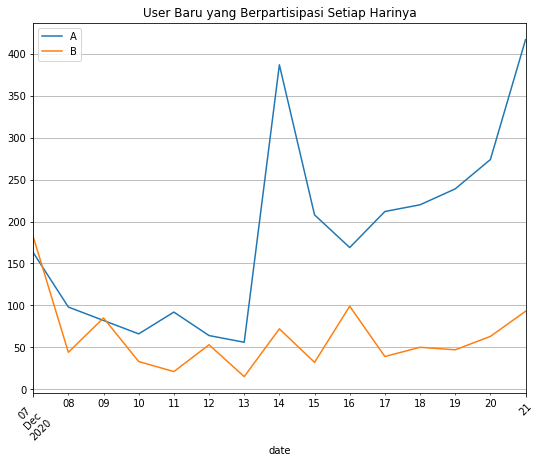

In [48]:
pd.pivot_table(new_users, 
               index = 'first_date', 
               columns = 'group', 
               values = 'user_id', 
               aggfunc = 'count').plot(ax = plt.subplot(2, 3, 1), grid = True, figsize = (30, 15))
plt.title('User Baru yang Berpartisipasi Setiap Harinya')
plt.xlabel('date')
plt.xticks(rotation = 45)
plt.legend()


#### Kesimpulan awal 12
- Group A jauh melampaui group B 
- Mungkin karena di karenakan ketimpangan distribusi persebaran user di group A sebanyak 74% seperti yang sudah di lakukan pada section 3.8

### User yang berpartisipasi secara keseluruhan

Text(0.5, 0, 'Hari tes')

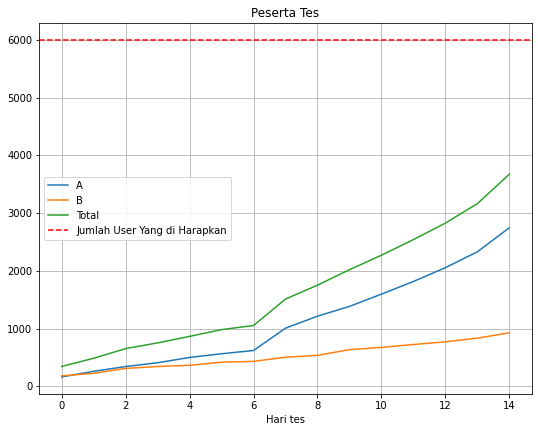

In [49]:
cumulative_test_users = cumulative_test_users.query('date >= @test_start and date <= @user_acquisition_end').set_index('test_day')[['A', 'B']]
cumulative_test_users['Total'] = cumulative_test_users['A'] + cumulative_test_users['B']
cumulative_test_users.plot(ax = plt.subplot(2, 3, 2), grid = True, figsize = (30, 15))
plt.axhline(y = required_participants, label = 'Jumlah User Yang di Harapkan', color = 'red', linestyle = '--')
plt.title('Peserta Tes')
plt.legend()
plt.xlabel('Hari tes')


### Conversion secara keseluruhan saat tes di jalankan 

Text(0.5, 0, 'Hari Tes')

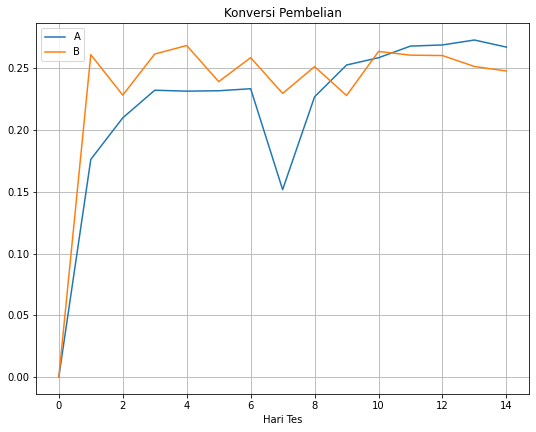

In [50]:
cumulative_test_payers = cumulative_test_payers.query('date >= @test_start and date <= @user_acquisition_end').set_index('test_day')[['A', 'B']]
cumulative_test_payers.div(cumulative_test_users)[['A', 'B']].fillna(0).plot(ax = plt.subplot(2, 3, 3), grid = True, figsize = (30, 15))
plt.title('Konversi Pembelian')
plt.legend()
plt.xlabel('Hari Tes')

#### Kesimpulan awal 13
- Group B lebih stabil
- Group A memiliki keganjilan antara test day 6 sampai 8
- Mungkin di karenakan adanya persebaran Data EU yang kurang akurat
- Seperti yang di eksplorasi pada chapter 3.6 dimana 
- Mungkin ada data yang tertumpuk pada proses input

### Conversi ke keranjang pembelian  pada saat tes di jalankan

Text(0.5, 0, 'Hari Tes')

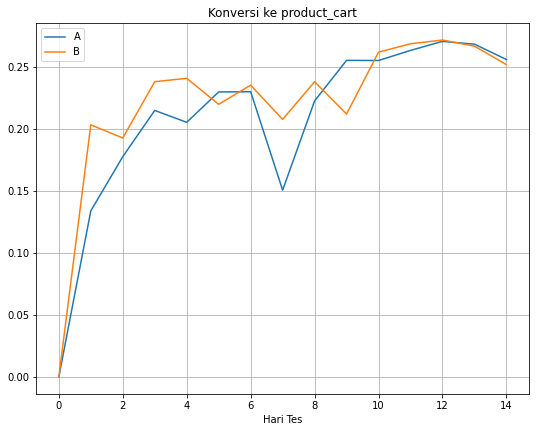

In [51]:
cumulative_test_carters = cumulative_test_carters.query('date >= @test_start and date <= @user_acquisition_end').set_index('test_day')[['A', 'B']]
cumulative_test_carters.div(cumulative_test_users)[['A', 'B']].fillna(0).plot(ax = plt.subplot(2, 3, 4), grid = True, figsize = (30, 15))
plt.title('Konversi ke product_cart')
plt.legend()
plt.xlabel('Hari Tes')

### Konversi ke event product saat test di jalankan

Text(0.5, 0, 'Hari Tes')

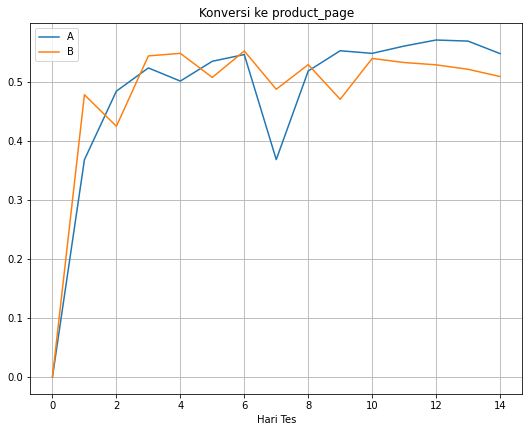

In [52]:
cumulative_test_product = cumulative_test_product.query('date >= @test_start and date <= @user_acquisition_end').set_index('test_day')[['A', 'B']]
cumulative_test_product.div(cumulative_test_users)[['A', 'B']].fillna(0).plot(ax = plt.subplot(2, 3, 5), grid = True, figsize = (30, 15))
plt.title('Konversi ke product_page')
plt.legend()
plt.xlabel('Hari Tes')


#### Kesimpulan awal 14
- Hal yang sama terjadi pada setiap konversi dari grafik 4.7, 4.8. Dimana Group A melebihi group B
- Conversi dari setiap funnel memiliki hasil yang berbeda di karenakan dataframe yang berbeda juga
- Penjalanan A/B test sepanjang selama 14hari berjalan dengan lancar hal yang ganjil kebanyakan dari datanya 

## Tes hyphothesis

### Pengecekan perbedaan antar group di fase converssion ke pembelian

In [53]:
report = test_participants.merge(events.query('event_name == "purchase"').groupby('user_id').agg({'details': 'count'}), on = 'user_id', how = 'left')
report['is_buyer'] = (report['details'] > 0).astype(int)
report = (report.groupby('group').agg({'user_id': 'count', 'is_buyer': 'sum'})
                                 .rename(columns = {'user_id': 'Members', 'is_buyer': 'Pembeli'}))
report['Konfersi'] = (report['Pembeli'] / report['Members']).round(2)
report

,Members,Pembeli,Konfersi
group,,,
A,2747,872,0.32
B,928,256,0.28


In [54]:
count = list(report['Pembeli'].values)
nobs = list(report['Members'].values)

pvalue = proportions_ztest(count, nobs)[1]
print('p-value: {}'.format(pvalue))
if pvalue >= alpha: 
    print('Hyphothesis null tidak di tolak: Dalam presentase tidak ada perbedaan konversi membeli antara kelompok A dan B.')
else:
    print('Hyphothesis null di tolak: Dalam presentase ada perbedaan konversi membeli antara kelompok A dan B.')

p-value: 0.017592402663314678
Hyphothesis null tidak di tolak: Dalam presentase tidak ada perbedaan konversi membeli antara kelompok A dan B.


###  Pengecekan convertion user yang ke product page 

In [55]:
report = test_participants.merge(events.query('event_name == "product_page"').groupby('user_id').agg({'event_dt': 'count'}), on = 'user_id', how = 'left')
report['is_buyer'] = (report['event_dt'] > 0).astype(int)
report = (report.groupby('group').agg({'user_id': 'count', 'is_buyer': 'sum'})
                                 .rename(columns = {'user_id': 'Members', 'is_buyer': 'User pada product page'}))
report['Konversi'] = (report['User pada product page'] / report['Members']).round(2)
report

,Members,User pada product page,Konversi
group,,,
A,2747,1780,0.65
B,928,523,0.56


In [56]:
count = list(report['User pada product page'].values)
nobs = list(report['Members'].values)

pvalue = proportions_ztest(count, nobs)[1]
print('p-value: {}'.format(pvalue))
if pvalue >= alpha: 
    print('Hyphothesis null tidak di tolak: Tidak ada perbedaan antara group A dan B dalam presentase pengguna yang melihat product page.')
else:
    print('Hyphothesis null di tolak: Ada perbedaan antara group A dan B dalam presentase pengguna yang melihat product page.')

p-value: 4.310980554712425e-06
Hyphothesis null di tolak: Ada perbedaan antara group A dan B dalam presentase pengguna yang melihat product page.


### Pengecekan perbedaan antara group dimana user mengunjungi product cart

In [57]:
report = test_participants.merge(events.query('event_name == "product_cart"').groupby('user_id').agg({'event_dt': 'count'}), on = 'user_id', how = 'left')
report['is_buyer'] = (report['event_dt'] > 0).astype(int)
report = (report.groupby('group').agg({'user_id': 'count', 'is_buyer': 'sum'})
                                 .rename(columns = {'user_id': 'Members', 'is_buyer': 'Users pada cart page'}))
report['Konfersi'] = (report['Users pada cart page'] / report['Members']).round(2)
report

,Members,Users pada cart page,Konfersi
group,,,
A,2747,824,0.30
B,928,255,0.27


In [58]:
count = list(report['Users pada cart page'].values)
nobs = list(report['Members'].values)

pvalue = proportions_ztest(count, nobs)[1]
print('p-value: {}'.format(pvalue))
if pvalue >= alpha: 
    print('Hyphothesis null tidak di tolak: Tidak ada perbedaan antara group A danB dalam presentase User yang melihat cart page.')
else:
    print('Hyphothesis null di tolak: Ada perbedaan antara group A dan B dalam presentase User yang melihat cart page.')

p-value: 0.14534814557238196
Hyphothesis null tidak di tolak: Tidak ada perbedaan antara group A danB dalam presentase User yang melihat cart page.


# Kesimpulan 

 Tes di jalankan secara tidak benar, bisa di simpulkan dari temuan di bawah ini

- Test yang berjalan bersamaan dengan promo ahir tahun
- Mungkin user yang berpartisipasi hanya melakukan sekali pembelian yang menjadikan hasil tes yang bias yang tidak akurat
- Distribusi user dari group A dan B memungkinkan adana user Ganda Selama A/B testing di jalankan
- Terdapat 887 User ganda yang merupakan 24,14 % user ganjil. 
- Hal ini merupakan bukti bahwa Tes A/B ini tidak berjalan dengan seharusnya
- Dari 6000 user yang berpawtisipasi ternyata ada 5% user yang berasal dari N. America, APAC, CIS
- Dari pernyataan 15 % user EU yang berpartisipasi ternyata Tanya 10 %
- Semua bisa di lakukan double cek dari chapter 3.1



# Rekomendasi
- Tes A/B ini lebih baik di lakukan ulang untuk mendapatkan hasil yang lebih baik